In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random_variable import RandomVariable, gaussian_distribution

Test random variable implementations

In [2]:
def test_var(var, n=1000):
    print(var)
    print(f"Expantacy(n={n}) = ", var.expantacy(n))
    print(f"Variance(n={n}) = ", var.variance(n))
    print(f"std(n={n}) = ", var.std(n))

In [3]:
print("Constante variable")
const = RandomVariable.constant_var(1,"1")
test_var(const)


Constante variable
1 :
   1
   1
   1
   1
Expantacy(n=1000) =  1.0
Variance(n=1000) =  0.0
std(n=1000) =  0.0


In [4]:
print("Random variable with normal law")
X = RandomVariable("X", gaussian_distribution(mu=-1.85, sigma=3.14))
test_var(X)

Random variable with normal law
X :
   -1.819810582328124
   -0.33408082525881144
   -3.5589365361693726
   -0.2691738718554666
Expantacy(n=1000) =  -1.9007135056398663
Variance(n=1000) =  10.63122170131444
std(n=1000) =  3.106071004680343


In [5]:
print("nuplet of the random variable above")
X_n = X.nuplet(3)
test_var(X_n)

nuplet of the random variable above
X_3 :
   [ 0.18165085 -4.35493022  2.3068234 ]
   [ 1.87654209 -1.86467269 -7.46127522]
   [-7.23909302 -1.65492039 -4.28698834]
   [-2.47855629 -0.83595438  0.03925472]
Expantacy(n=1000) =  [-1.72995477 -1.80689358 -1.94969031]
Variance(n=1000) =  [ 9.29276584 10.61909052 10.0141315 ]
std(n=1000) =  [3.17544368 3.04669392 3.19239693]


In [6]:
X_minus_X = X - X
test_var(X_minus_X)

X-X :
   1.5534101501293867
   -0.0453951202780325
   -3.659891006039042
   0.7212034303699149
Expantacy(n=1000) =  0.0574708455217624
Variance(n=1000) =  18.12964563599559
std(n=1000) =  4.336328026536421


In [7]:
X_plus_X = X + X
test_var(X_plus_X)

X+X :
   -4.92636809486873
   -2.780816029198356
   -7.425862244289846
   1.2896938853423112
Expantacy(n=1000) =  -3.8213623059111312
Variance(n=1000) =  19.201541225496236
std(n=1000) =  4.407771915103613


In [8]:
X_pow_2 = X**2
test_var(X_pow_2)

X^2 :
   14.799413367023037
   3.8439486441593447
   43.92181755191345
   0.5238450287446825
Expantacy(n=1000) =  12.518576800564286
Variance(n=1000) =  306.0120449245819
std(n=1000) =  18.635632403100974


Density Estimation

We use the **Kernel Method** to approximate the probability density function of a random variable.

$K: \mathbb{R} \to \mathbb{R_{+}}$ is a kernel function if:
- K is integrable
- K is even
- $\int_{\mathbb{R}}^{} K(x) \, dx = 1$

Let $h>0$. Then, $x \mapsto \frac{1}{h}K(\frac{x}{h})$ is a kernel. h is a scaling factor.

Approximate probability density is: $$\hat{f}(x) = \frac{1}{Nh}\sum_{i=1}^N K(\frac{x-x_i}{h})$$

In case of bivariate density approximation the formula is: $$\hat{f}(x,y) = \frac{1}{Nh_xh_y}\sum_{i=1}^N K(\frac{x-x_i}{h_x})K(\frac{y-y_i}{h_y})$$

Value of scaling factor $h$ in case of Gaussian kernel:
- Scott's method: $h=\sigma n^{-\frac{1}{5}}$
- Silverman's method: $h=0.9* \sigma n^{-\frac{1}{5}}$

Gaussian kernel: $$K(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -\frac{x^2}{2 \sigma^2} \right)$$


In [9]:
print("Random variable with normal law")
mu    = 0
sigma = 1

var = RandomVariable("X", gaussian_distribution(mu=mu, sigma=sigma))
print(var)

Random variable with normal law
X :
   0.11895181044173064
   0.4027479598096003
   0.2010697149763494
   -0.6564021158841055


In [10]:
t = np.linspace(-4,4,500)
real_density = np.exp(-(t-mu)**2 / 2 / sigma**2) / np.sqrt(2 * np.pi) / sigma
gaussian_kernel = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

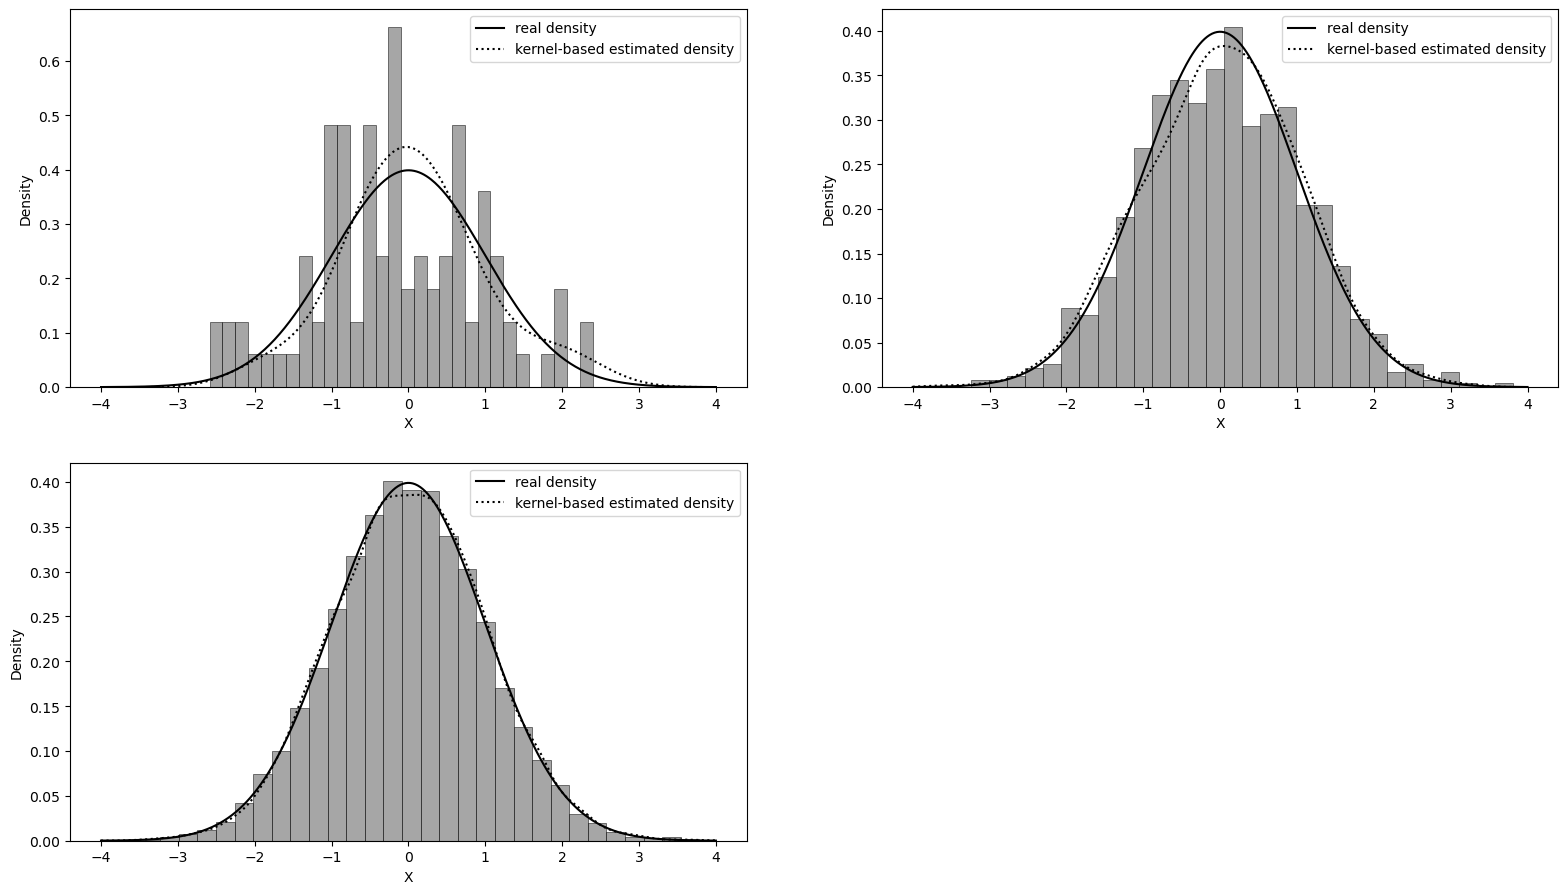

In [11]:
plt.figure(figsize=(19.20,10.80))
for i in range(1, 4):
    N = 10**(i+1)
    ax = plt.subplot(2,2,i)
    estimated_density = var.estimated_density(x=t, kernel=gaussian_kernel, n=N)
    ax.plot(t, real_density, c="black", label="real density")
    ax.plot(t, estimated_density, c="black", linestyle="dotted", label="kernel-based estimated density")
    var.plot(ax=ax, n=N)
    ax.legend()
plt.show()

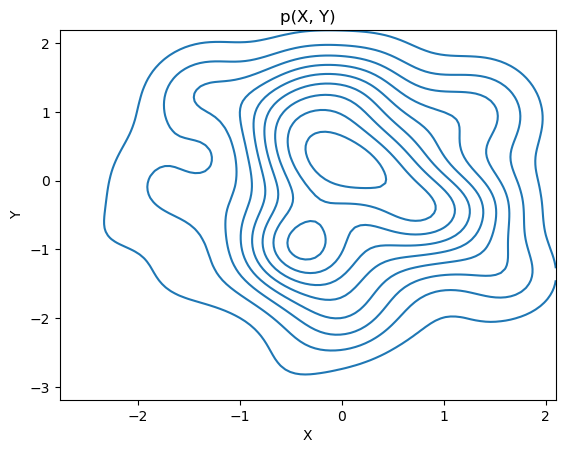

In [12]:
n = 100
var_x = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
var_y = RandomVariable("Y", gaussian_distribution(mu=0, sigma=1))
# var_y = 2*var_x + RandomVariable("Noise", gaussian_distribution(mu=0, sigma=1))
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax)
plt.show()

Here the two variables are independant. Thus the contours are nearly circular or symmetric around the origin.

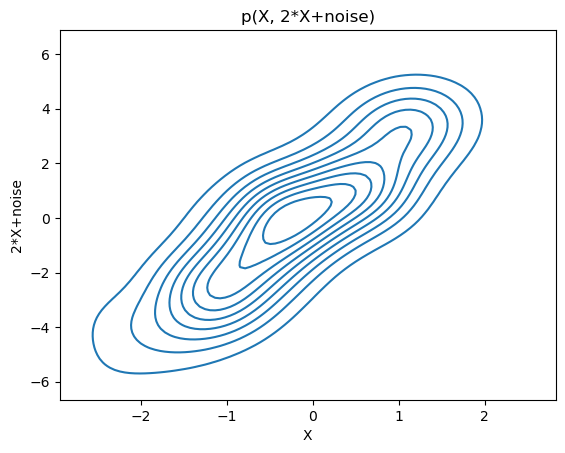

In [13]:
n = 100
x = np.random.normal(0,1,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax) # Positive correlation
plt.show()

Positive correlation: the contours slope from bottom-left to top-right, it suggests a positive relationship (when one variable increases, the other also increases).

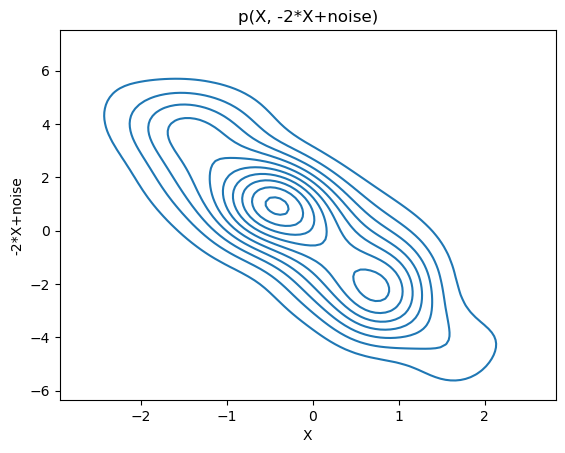

In [14]:
y = -2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("-2*X+noise", lambda n: y[:n])
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax) # Negative correlation
plt.show()

Negative correlation: the contours slope from top-left to bottom-right, it indicates a negative correlation (when one variable increases, the other decreases).

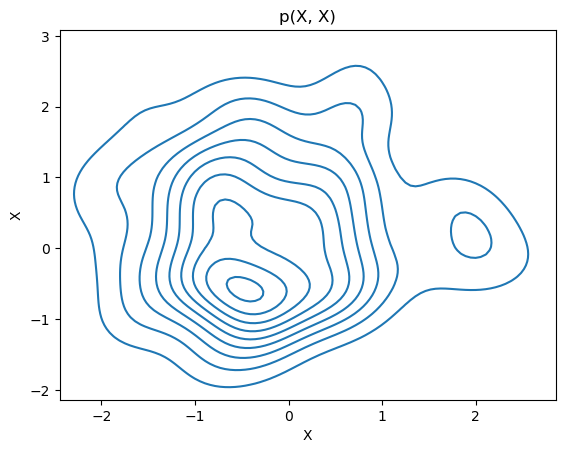

In [15]:
var_x = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
var_y = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax) # No correlation
plt.show()

No apparent correlation: the contours are nearly circular or symmetric around the origin, it might suggest no correlation between the variables.

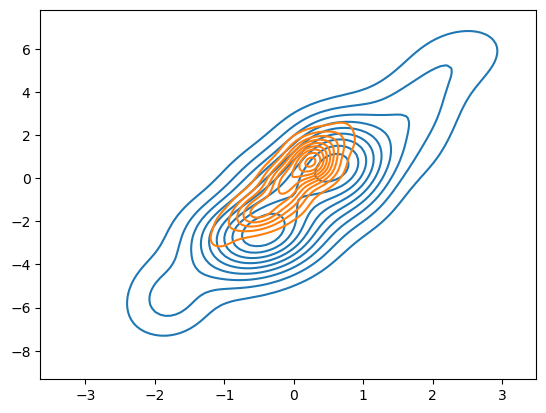

In [25]:
x = np.random.normal(0,1,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax)

x = np.random.normal(0,0.5,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,0.5,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax, colors="#ff7f0e")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title('')
plt.show()

**Wide contours** indicate that both variables have high variance.

**Narrow contours** suggest low variance or high concentration of data around specific values.

Diabete dataset

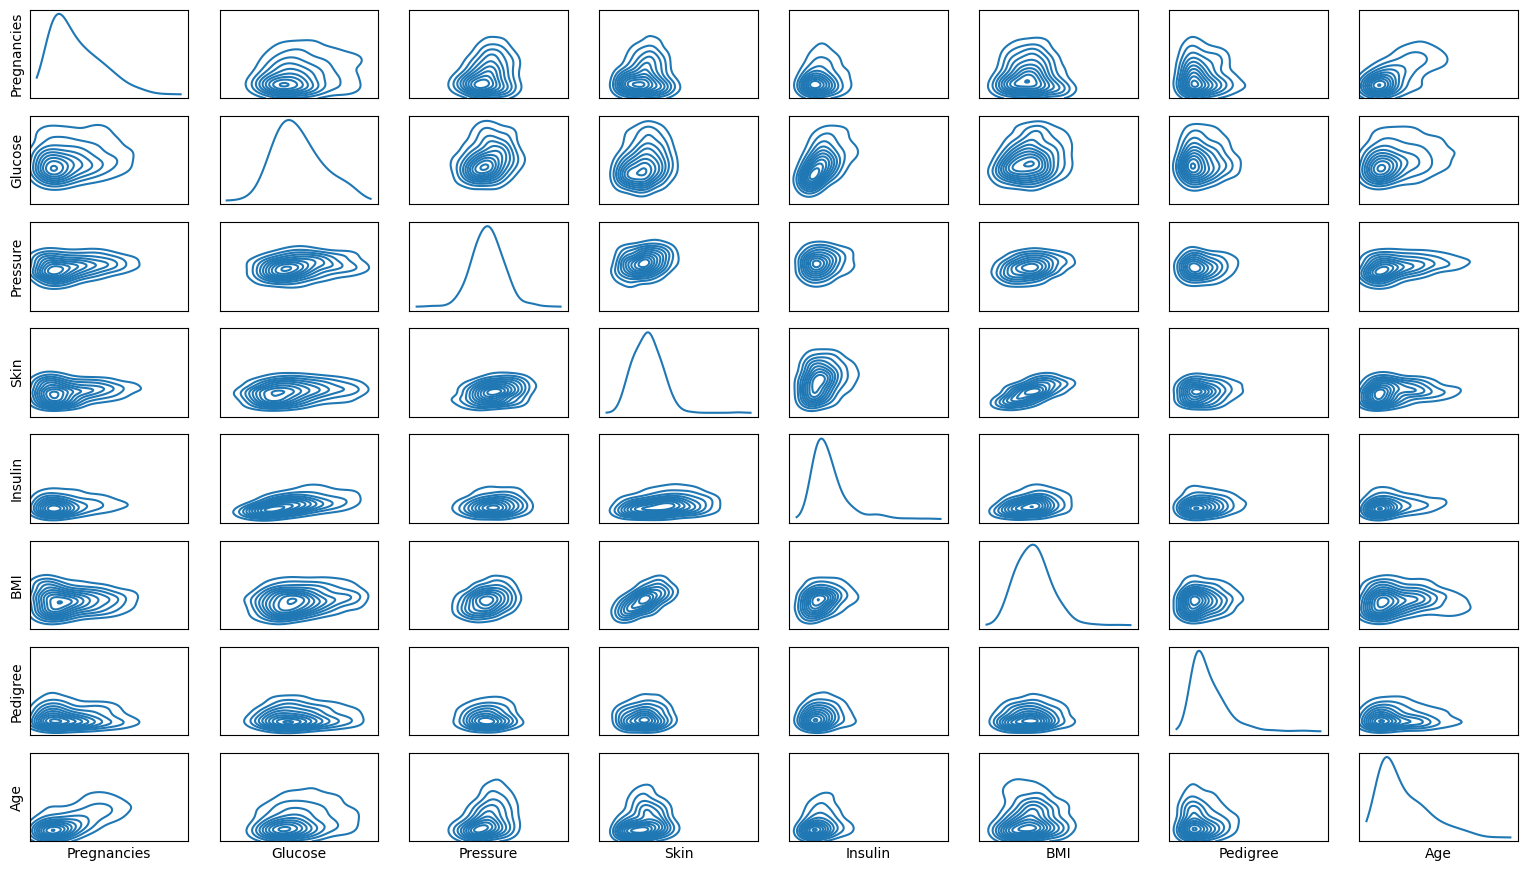

In [29]:
# Get dataset from https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download
df_init = pd.read_csv('diabetes.csv')
df_init.rename(columns={'BloodPressure': 'Pressure', 'SkinThickness': 'Skin', 'DiabetesPedigreeFunction': 'Pedigree', 'Outcome':'Diabetes'}, inplace=True)
features_to_cleanse = ['Glucose','Pressure','Skin','Insulin','BMI']
df_init[features_to_cleanse] = df_init[features_to_cleanse].replace(0, np.nan)
gaussian_kernel = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
# n = len(df)
n = 100
columns = df_init.columns[:-1]
fig, axes = plt.subplots(8,8, figsize=(19.2, 10.8))

for i in range(len(columns)):
    for j in range(len(columns)):
        var1 = columns[i]
        var2 = columns[j]
        if i!=j:
            df = df_init.loc[:, [var1,var2]].dropna()
        else: df = df_init.loc[:, [var1]].dropna()
        var_x = RandomVariable(var1, distribution=lambda n: df[var1][:n].values, max_values=len(df[var1]))
        var_y = RandomVariable(var2, distribution=lambda n: df[var2][:n].values, max_values=len(df[var2]))
        plot = True
        ax = axes[i, j]
        if i==j:
            plot = False
        xx, yy, joint_density = RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax, plot=plot, method="scott")
        if not plot: ax.plot(var_x.estimated_density(None, gaussian_kernel, n))
        ax.set_title('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
for i in range(len(columns)): axes[i,0].set_ylabel(columns[i])
for i in range(len(columns)): axes[7,i].set_xlabel(columns[i])
plt.show()